In [3]:
import sys
import matplotlib.pyplot as plt

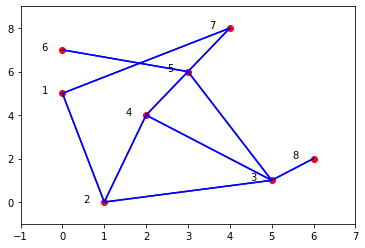

Give the start point
Give the end point
The shortest path from startPoint: 1 to endPoint: 8 is: 38
This path starts from node: 1
Goes through node/nodes: 2 3
And ends at: 8


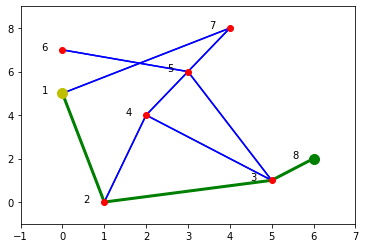

In [4]:
if __name__ == '__main__':

    Adj_Matrix = [[0, 20, 0, 0, 0, 0, 15, 0],
                  [20, 0, 8, 9, 0, 0, 0, 0],
                  [0,  8,  0,  6, 15, 0, 0, 10], 
                  [0, 9, 6, 0, 7, 0, 0, 0],
                  [0, 0, 15, 7, 0, 22, 18, 0],
                  [0, 0, 0, 0, 22, 0, 0, 0],
                  [15, 0, 0, 0, 18, 0, 0, 0],
                  [0, 0, 10, 0, 0, 0, 0, 0]]
      
    State_Matrix = [[sys.maxsize, 0,  0],
                    [sys.maxsize, 0,  0],
                    [sys.maxsize, 0,  0],
                    [sys.maxsize, 0,  0],
                    [sys.maxsize, 0,  0],
                    [sys.maxsize, 0,  0],
                    [sys.maxsize, 0,  0],
                    [sys.maxsize, 0,  0]]
    
    Coord_Matrix_x=[0, 1, 5, 2, 3, 0, 4, 6]
    Coord_Matrix_y=[5, 0, 1, 4, 6, 7, 8, 2]
    

    plt.plot(Coord_Matrix_x, Coord_Matrix_y, 'ro')
    plt.axis([-1, 7, -1, 9])
    
    for i in range(8):
        plt.text(Coord_Matrix_x[i]-0.5, Coord_Matrix_y[i], str(i+1))
    
    for i in range(8):
        for j in range(8):
            if Adj_Matrix[i][j] != 0:
                plt.plot([Coord_Matrix_x[i], Coord_Matrix_x[j]], [Coord_Matrix_y[i], Coord_Matrix_y[j]], 'b')
    
    plt.show(block=False)
    

      
    print('Give the start point')
    startPoint = int(input()) - 1
    
    print('Give the end point')
    endPoint = int(input()) - 1

    ##Here you should add the shortest path computations according to Dijkstra's algorithm.

    #Creates a variable called "Current_node" which is first assigned the startPoint. Later it will be assigned the next node to be iterated over.
    #Sets the distance of the startPoint to '0' in the "State_Matrix" for it to iterate correctly in the beginning of the script
    # and not update the distance from the startPoint to itself by adding its default 'sys.maxsize' value to the distance.
    Current_node = startPoint
    State_Matrix[startPoint][0] = 0

    #Instantiate a for loop which runs for as many times as the number of nodes present in the "Adj_Matrix"
    for i in range(len(Adj_Matrix)):

        #Iterates over each distance from the "Current_node" to each other node.
        #The "enumerate()" function enables to expose both the index of each other node and its distance from the "Current_node".
        for index, dist in enumerate(Adj_Matrix[Current_node]):
            
            #If: 1) there is a distance to this node (them being directly connected). AND 2) its distance have not previously been calculated.
            #Do: 1) Update its distance by this distance + the distance to the current node. 2) Assign the path to this node as the current node.
            if dist != 0 and State_Matrix[index][0] == sys.maxsize:
                State_Matrix[index][0] = dist + State_Matrix[Current_node][0]
                State_Matrix[index][1] = Current_node

            #If: 1) there is a distance to this node (them being directly connected). AND 2) It has not previously been visited. 
            # AND 3) The distance + the current nodes distance is lesser than the currently shortest path.
            #Do: 1) Update its distance by this distance + the distance to the current node. 2) Assign the path to this node as the current node.
            elif dist != 0 and State_Matrix[index][2] != 1 and (State_Matrix[Current_node][0] + dist) < State_Matrix[index][0]:
                State_Matrix[index][0] = dist + State_Matrix[Current_node][0]
                State_Matrix[index][1] = Current_node

        #Sets the current node as visited
        State_Matrix[Current_node][2] = 1

        #Decides which node should next be visited based on which currently has the shortest path.
        #It can not have a distance of 0 and can not have been visited before.
        Current_shortest_dist = sys.maxsize
        for index, node in enumerate(State_Matrix):
            if node[0] != 0 and node[0] < Current_shortest_dist and node[2] != 1:
                Current_shortest_dist = node[0]
                Current_shortest_node = index
        Current_node = Current_shortest_node

    ##Print the result from Dijkstras and draw the plot again to allow you to draw the path in it. 
    
    #Prints out the start, end and its distance.
    print("The shortest path from startPoint: {} to endPoint: {} is: {}".format(startPoint +1, endPoint +1, State_Matrix[endPoint][0]))

    #Creates two lists: 1)"path_list" to generate the nodes being passed for printing its path in text. 
    # and 2)"plot_list" to generate the index of the nodes passed to plot the path being taken (used later in the script).
    path_list = []
    plot_list = []
    cur_nod = endPoint
    for i in range(len(Adj_Matrix)):
        if State_Matrix[cur_nod][1] != startPoint:
            path_list.insert(0, State_Matrix[cur_nod][1] +1)
            plot_list.insert(0, State_Matrix[cur_nod][1])
            cur_nod = State_Matrix[cur_nod][1]
    
    #Adds the startPoint in the beginning of the plot list and the endPoint at the end of the plot list.
    plot_list.insert(0, startPoint)
    plot_list.append(endPoint)

    #Generate the x,y coordinates of each node in the path taken into two separate lists being used to plot the result.
    path_x = []
    path_y = []
    for i in plot_list:
        path_x.append(Coord_Matrix_x[i])
        path_y.append(Coord_Matrix_y[i])
    
    #Prints out the path taken for the shortest path analysis        
    print("This path starts from node: {}".format(startPoint +1))
    print("Goes through node/nodes:", *path_list)
    print("And ends at: {}".format(endPoint +1))

    #Add your code for drawing the path in the plot here
    
    plt.axis([-1, 7, -1, 9])
    
    for i in range(8):
        plt.text(Coord_Matrix_x[i]-0.5, Coord_Matrix_y[i], str(i+1))
    
    for i in range(8):
        for j in range(8):
            if Adj_Matrix[i][j] != 0:
                plt.plot([Coord_Matrix_x[i], Coord_Matrix_x[j]], [Coord_Matrix_y[i], Coord_Matrix_y[j]], 'b')
    #Plots the path lines as green lines on top of the blue lines
    plt.plot(path_x, path_y, 'g', linewidth=3)
    
    #Plots the start node as Yellow and the end node as Green
    plt.plot(Coord_Matrix_x, Coord_Matrix_y, 'ro')
    plt.plot(path_x[0], path_y[0], 'yo-', markersize=10)
    plt.plot(path_x[-1], path_y[-1], 'go-', markersize=10)

    #plt.show(block=False)
    plt.show()